# Demonstration of the CNN used for time series classification

## Data preparation

In order to feed data to our model, we need to turn it into a keras sequence. This way it is fed to the network as batches of 1 sample each time, and there is no issue with the fact the time series have a different size. The whole preparation is done in the data_preparation function. The data are also shuffled.

In [1]:
from cnn import Turtlebot_CNN,Turtlebot_LSTM,data_preparation
from read_data import make_dataset,read_bag
import tensorflow as tf
import matplotlib.pyplot as plt
import math


ds,l=data_preparation(path='/home/rwu-lh/FullData')


ng_goals_2021-06-30-11-41-29 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/42/auto_sending_goals_2021-06-30-11-21-01 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/34/auto_sending_goals_2021-06-30-11-02-56 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/17/auto_sending_goals_2021-06-29-11-53-49 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/9/auto_sending_goals_2021-06-29-11-36-54 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/35/auto_sending_goals_2021-06-30-11-05-12 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/26/auto_sending_goals_2021-06-29-12-14-09 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/21/auto_sending_goals_2021-06-29-12-02-51 already exists. Not creating.
[INFO]  Data folder /home/rwu-lh/FullData/OdomNoise/50/auto_sending_goals_

In [2]:
ds=ds.shuffle(l)
prop_train_val=0.8
l_train_val=math.ceil(prop_train_val*l)
train_val=ds.take(l_train_val)
test=ds.skip(l_train_val)
prop_train=0.8
l_train=math.floor(prop_train*l_train_val)
train=train_val.take(l_train)
validation=train_val.skip(l_train)
print(l_train)

115


In [3]:
train=train.padded_batch(1,padding_values=tf.cast(-1,tf.float64))
test=test.batch(1)
validation=validation.batch(1)

## Training the Model

We can now train the model using the fit method.

In [5]:

lstm=Turtlebot_LSTM()
cb_list_lstm=[tf.keras.callbacks.ModelCheckpoint('lstm_model/checkpoint_lstm_new.h5',monitor='val_loss',save_best_only=True,save_weights_only=True)]#tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50),
lstm.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
hist_lstm=lstm.fit(train,epochs=1,callbacks=cb_list_lstm,verbose=1,validation_data=validation)

115/115 [==============================] - 50s 411ms/step - loss: 1.0269 - categorical_accuracy: 0.4870 - val_loss: 0.9973 - val_categorical_accuracy: 0.5517


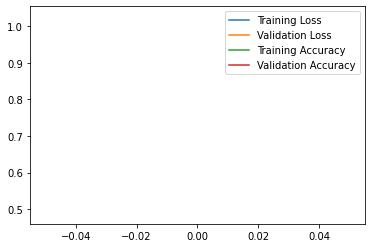

36/36 [==============================] - 3s 72ms/step - loss: 0.0792 - categorical_accuracy: 0.9722


[0.079177625477314, 0.9722222089767456]

In [6]:
lstm.load_weights('lstm_model/checkpoint_lstm.h5')
plt.figure()
plt.plot(hist_lstm.history['loss'],label='Training Loss')
plt.plot(hist_lstm.history['val_loss'],label='Validation Loss')
plt.plot(hist_lstm.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_lstm.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()
lstm.evaluate(test)

In [4]:
cnn=Turtlebot_CNN()
cb_list_cnn=[tf.keras.callbacks.ModelCheckpoint('cnn_model/checkpoint_cnn_new.h5',monitor='val_loss',save_best_only=True,save_weights_only=True)]#,tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=50)]
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy()])
hist_cnn=cnn.fit(train,epochs=500,callbacks=cb_list_cnn,verbose=1,validation_data=validation)
cnn.summary()

poch 394/500
115/115 [==============================] - 2s 15ms/step - loss: 0.3027 - categorical_accuracy: 0.8522 - val_loss: 0.3539 - val_categorical_accuracy: 0.7586
Epoch 395/500
115/115 [==============================] - 2s 15ms/step - loss: 0.3853 - categorical_accuracy: 0.8087 - val_loss: 0.2599 - val_categorical_accuracy: 0.8276
Epoch 396/500
115/115 [==============================] - 2s 15ms/step - loss: 0.3662 - categorical_accuracy: 0.8174 - val_loss: 0.2064 - val_categorical_accuracy: 0.8621
Epoch 397/500
115/115 [==============================] - 2s 16ms/step - loss: 0.2904 - categorical_accuracy: 0.8696 - val_loss: 0.2681 - val_categorical_accuracy: 0.8621
Epoch 398/500
115/115 [==============================] - 2s 15ms/step - loss: 0.2965 - categorical_accuracy: 0.8348 - val_loss: 0.3585 - val_categorical_accuracy: 0.8621
Epoch 399/500
115/115 [==============================] - 2s 15ms/step - loss: 0.4309 - categorical_accuracy: 0.7478 - val_loss: 0.1977 - val_categorica

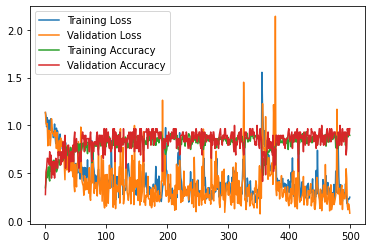

36/36 [==============================] - 0s 4ms/step - loss: 0.1514 - categorical_accuracy: 0.9722


[0.15144561231136322, 0.9722222089767456]

In [6]:
cnn.load_weights('cnn_model/checkpoint_cnn_new.h5')

plt.figure()
plt.plot(hist_cnn.history['loss'],label='Training Loss')
plt.plot(hist_cnn.history['val_loss'],label='Validation Loss')
plt.plot(hist_cnn.history['categorical_accuracy'],label='Training Accuracy')
plt.plot(hist_cnn.history['val_categorical_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()
cnn.evaluate(test)

## Testing the model

Here is a Visualization of what the CNN does 

![Visualization of the CNN](img/Schema_CNN.png)

In [ ]:
import numpy as np
def results(model,test):
    res=model.predict(test)
    c=0
    for i,pred in enumerate(res):
        y=test[i][1][0]
        if np.argmax(y)==np.argmax(pred):
            c+=1
    return(c/len(res))
            

In [ ]:
lstm.load_weights('lstm_model/checkpoint_lstm.h5')
cnn.load_weights('cnn_model/checkpoint_cnn.h5')
print('LSTM :',results(lstm,test))
print('CNN :',results(cnn,test))

In [ ]:
model.predict(test)

In [ ]:
train[0]

In [ ]:
tf.data.Dataset.from_generator(train)

In [ ]:
odoms,scans,labels=make_dataset('/media/louis/TOSHIBA EXT/FullData')

In [ ]:
tf.data.Dataset.from_generator(lambda :odoms,output_shapes=[None,13],output_types=tf.float32)

In [ ]:
np.shape(odoms[1])

In [ ]:
lstm=Turtlebot_CNN(type='lstm')
lstm.compile(optimizer='adam',loss='categorical_crossentropy')
lstm.load_weights('lstm_model/checkpoint_lstm.h5')
lstm.predict(train)

In [ ]:
for element in train:
    print(element)

In [ ]:
train